In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master.zip" -d "/content/drive/MyDrive/Colab Notebooks/resnet/"

Archive:  /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master.zip
5e9bcca7e467f7baf3459d809ef16bb75e53f115
   creating: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/
 extracting: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/.gitignore  
  inflating: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/.travis.yml  
  inflating: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/LICENSE  
  inflating: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/README.md  
  inflating: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/cifar10.py  
   creating: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/images/
  inflating: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/images/architecture.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/resnet/keras-resnet-master/images/convergence.png  
  inflating: /content/drive/MyDrive/Colab Note

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/project2/FaceDetect4/facenet-pytorch-master/examples/"
!pwd

/content/drive/MyDrive/Colab Notebooks/project2/FaceDetect4/facenet-pytorch-master/examples
/content/drive/MyDrive/Colab Notebooks/project2/FaceDetect4/facenet-pytorch-master/examples


In [ ]:
# MTCNN
!pip3 install facenet
!pip3 install MTCNN
!pip3 install facenet_pytorch
!pip3 install opencv-python
!pip3 install MMCV
!pip3 install IPython
!pip3 install Ipython display
# Dlib 
!pip3 install dlib
!pip3 install imutils
!pip3 install cmake
!pip3 install scipy

In [ ]:
# MTCNN 
from facenet_pytorch import MTCNN 
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython.display  import display
from torchvision import datasets, transforms
from tensorflow import keras
import joblib
#HTML Video
from IPython.display import HTML
from base64 import b64encode
# Dlib
import dlib, imutils
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt
# Euclidean distance
from scipy.spatial import distance
from math import sqrt
import pandas as pd

1
2
3
4


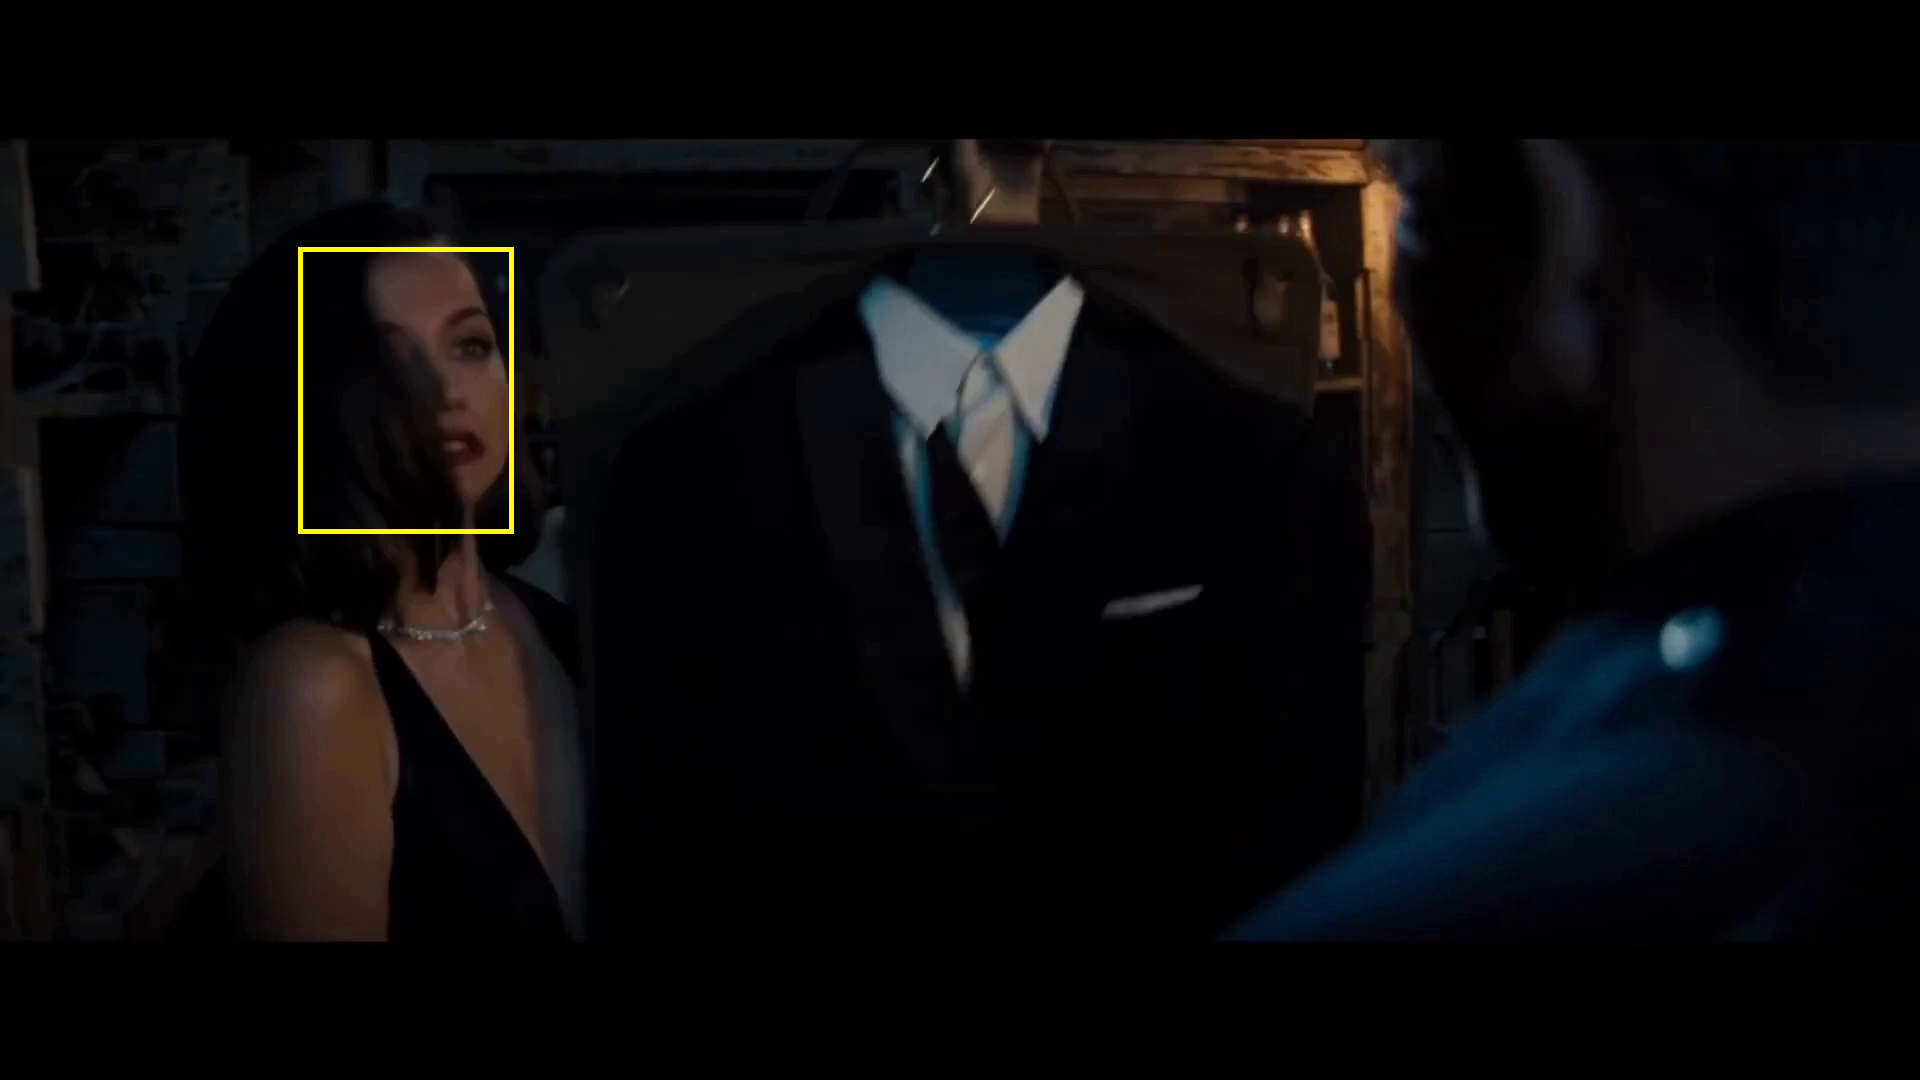

5


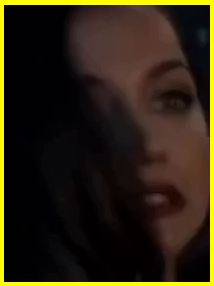

2
3
4


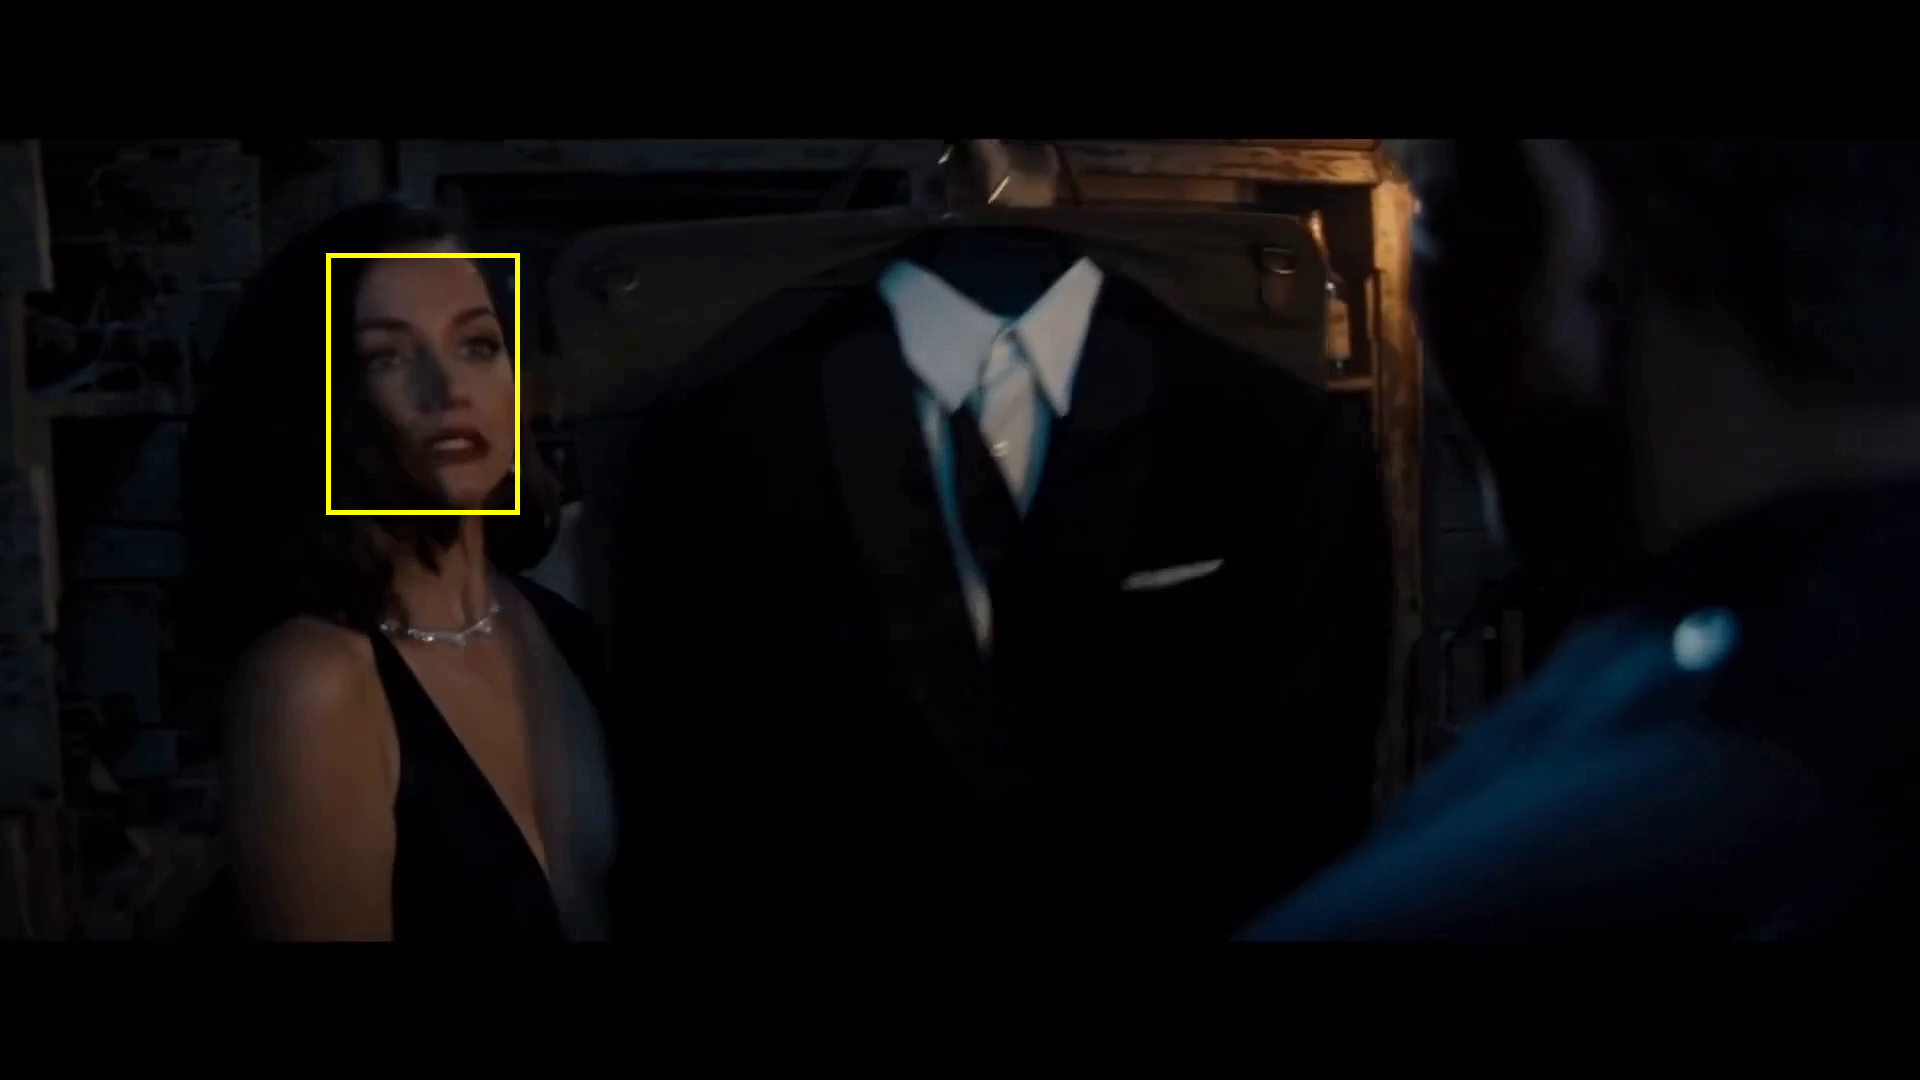

5


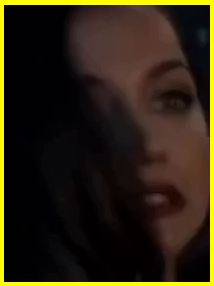

5


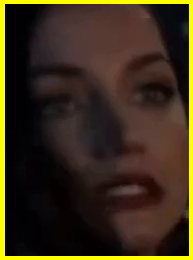

2
3
4


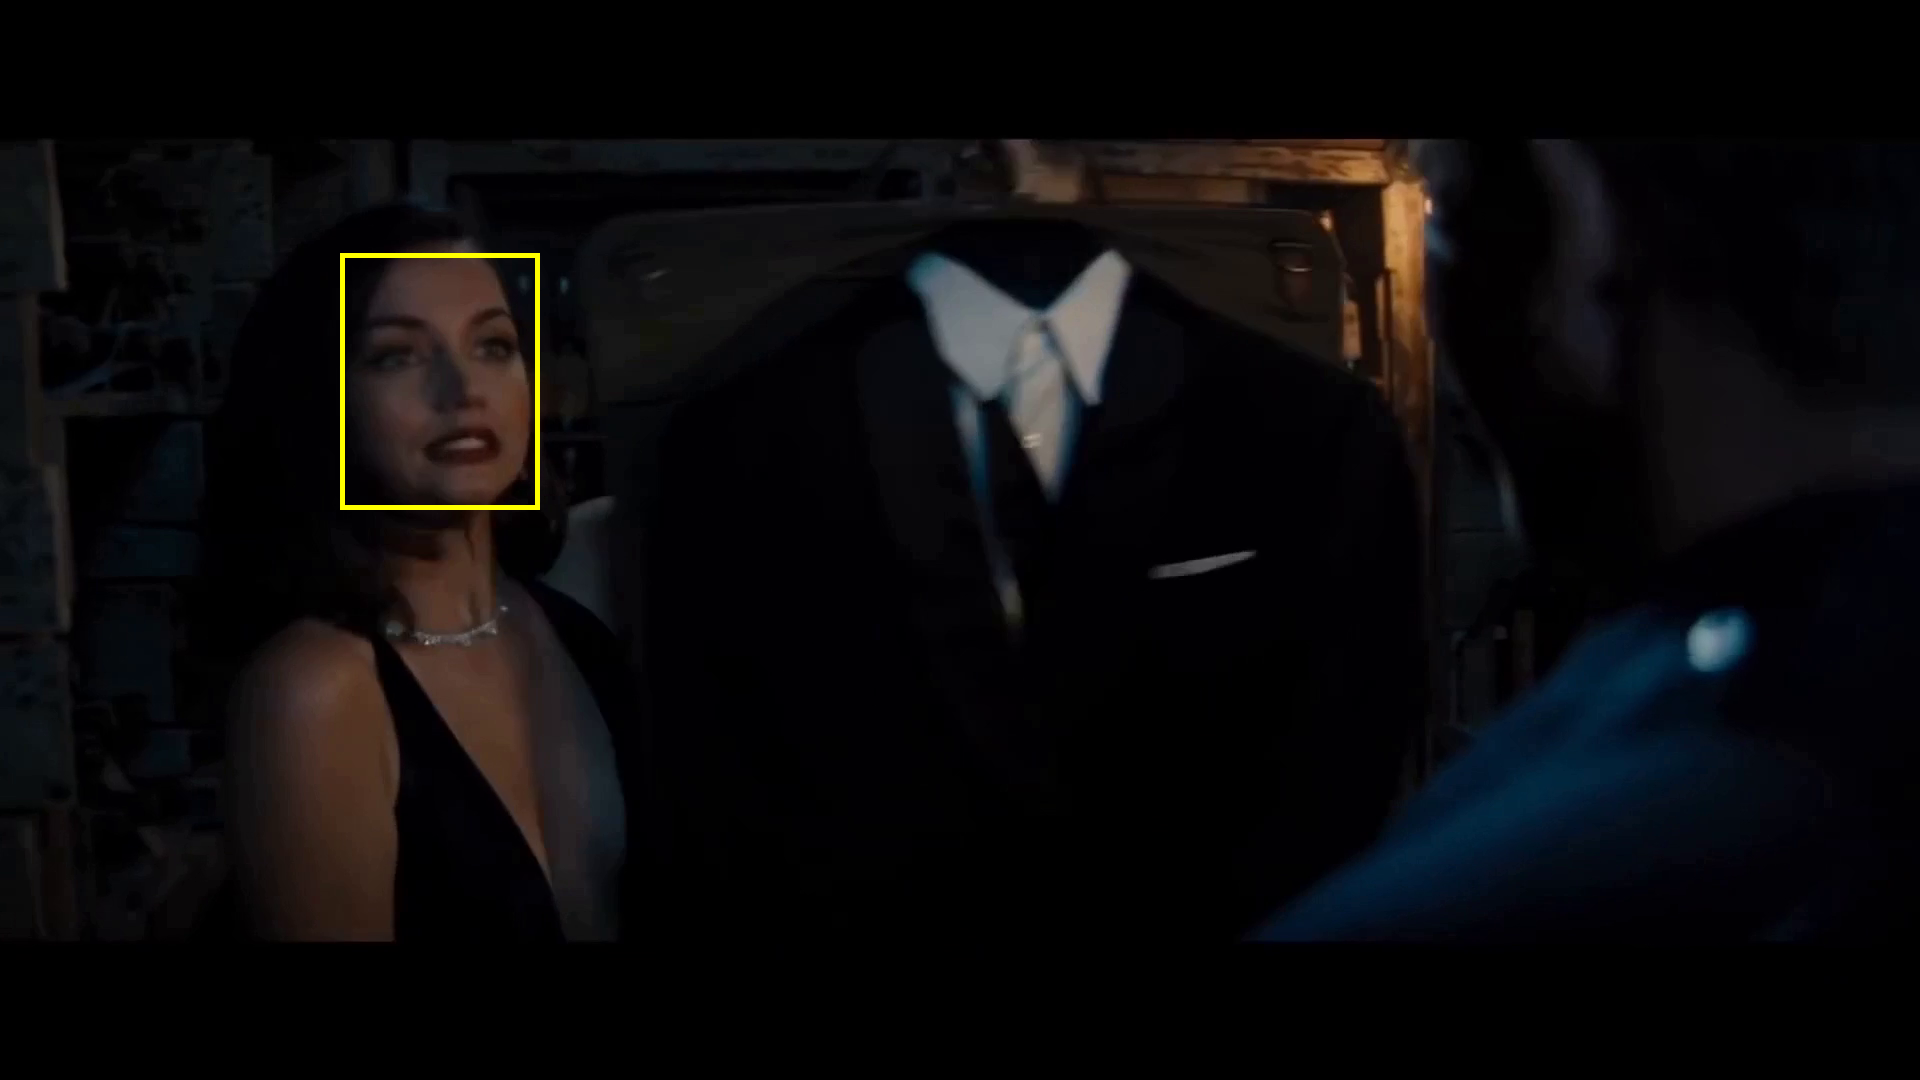

5


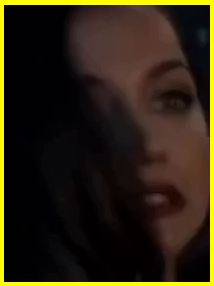

5


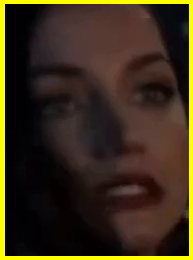

5


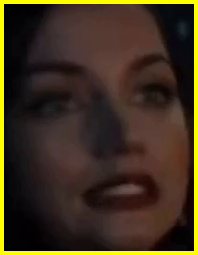

2
3
4


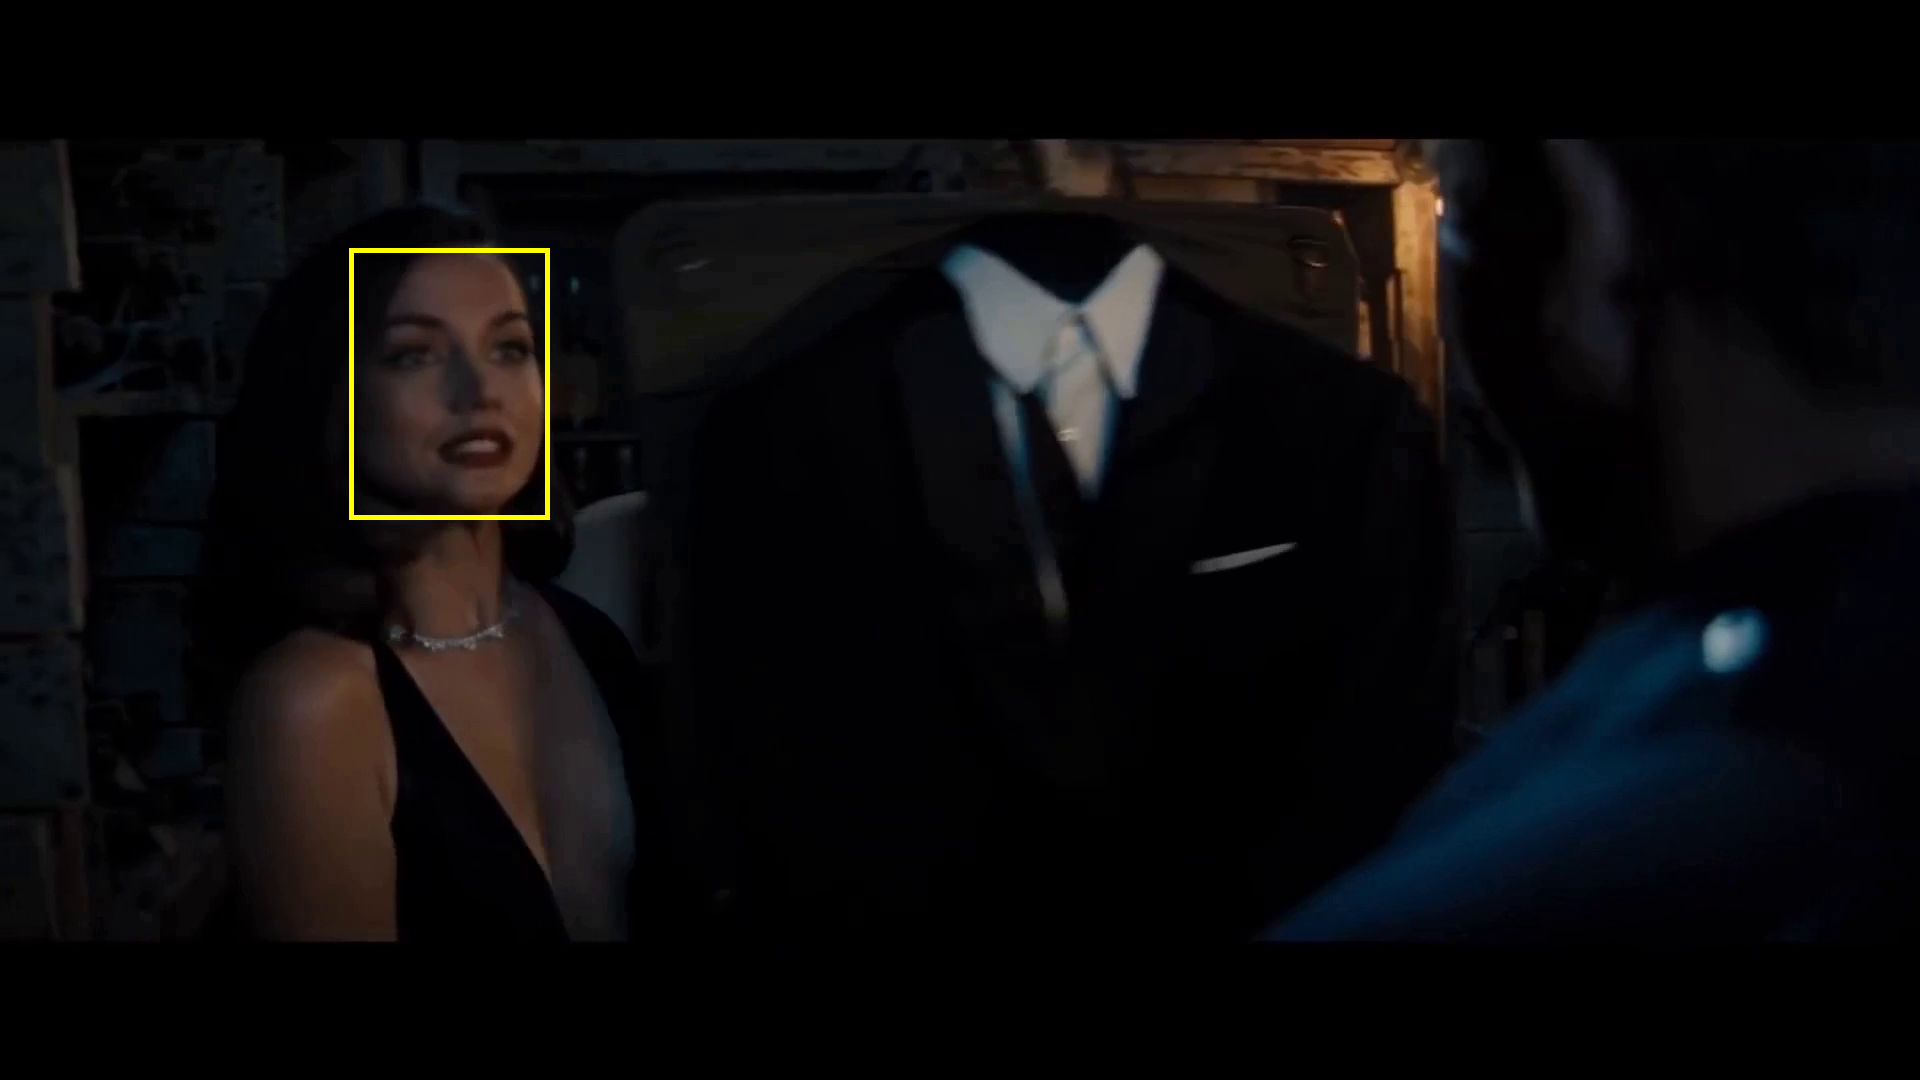

5


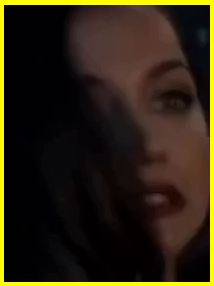

5


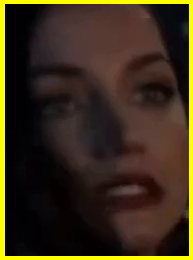

5


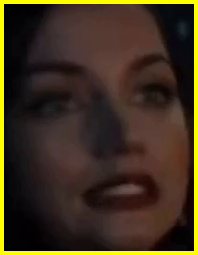

5


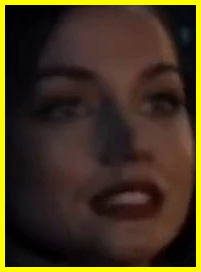

[<PIL.Image.Image image mode=RGB size=214x286 at 0x7FC7987B4590>,
 <PIL.Image.Image image mode=RGB size=214x286 at 0x7FC798812250>,
 <PIL.Image.Image image mode=RGB size=193x260 at 0x7FC798812A90>,
 <PIL.Image.Image image mode=RGB size=214x286 at 0x7FC798812C90>,
 <PIL.Image.Image image mode=RGB size=193x260 at 0x7FC798773390>,
 <PIL.Image.Image image mode=RGB size=198x255 at 0x7FC798812B90>,
 <PIL.Image.Image image mode=RGB size=214x286 at 0x7FC798863E90>,
 <PIL.Image.Image image mode=RGB size=193x260 at 0x7FC798812DD0>,
 <PIL.Image.Image image mode=RGB size=198x255 at 0x7FC79877F4D0>,
 <PIL.Image.Image image mode=RGB size=201x272 at 0x7FC79877FC50>]

In [ ]:
MTCNN_model("/content/drive/MyDrive/Colab Notebooks/noFace (online-video-cutter.com) (3).mp4")


In [ ]:
# MTCNN 
def MTCNN_model(v_path):
    cutted_face_location = [] 
    frame_list = []
    croppedImage_list = []

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  
    mtcnn = MTCNN(keep_all=True, device=device) 
    video = mmcv.VideoReader(v_path)
    print(1)
    frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
    for frame in frames:  
      print(2)
      boxes, _ = mtcnn.detect(frame)
      frame_draw = frame.copy()
      draw = ImageDraw.Draw(frame_draw)
      if boxes is not None:
        print(3)
        for box in boxes:
            if box is not None :
                print(4)
                draw.rectangle(box.tolist(), outline=(255, 255, 0), width=5)
                display(frame_draw)
                frame_list.append(frame_draw)
                cutted_face_location.append(box)
            for i in range(len(frame_list)):
              print(5)
              x,y,w,h=cutted_face_location[i]
              croppedImage=frame_list[i].crop((x,y,w,h))
              croppedImage_list.append(croppedImage)
              display(croppedImage)
      else:
        display(frame_draw)
        print(6)
    return   croppedImage_list

# Dlib
def DLIB_face_landmarks_detection(croppedImage_list):

  nparray_detected_rectangle_faces = []
  coordinate_list = np.zeros(68)
  # 모델 로딩
  try:
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/shape_predictor_68_face_landmarks.dat")
  except:
    print("Dlib Predictor read error")
  # 타입 바꾸기 np array 로 바꾸기
  for i1 in croppedImage_list:
    numpy_image = np.array(i1)


    for j in numpy_image:
      image = cv2.cvtColor(j, cv2.COLOR_RGB2BGR)
      imgae = cv2.resize(image,(1000,1000),interpolation = cv2.INTER_CUBIC)
      image = imutils.resize(image, width=1000)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      rectangle = detector(image, 1)

      for(i, rect) in enumerate(rectangle):
        LAND = predictor(color_image, rect)
        LAND = face_utils.shape_to_np(LAND)
        coordinate_list.append(LAND)

    return coordinate_list # np array

# Euclidean Distance
def calculate_distance(vector_dim):
  dist = []
  for i in range(68):
    if i != 30:
      dist.append(distance.euclidean(vector_dim[30],vector_dim[i]))
  return dist

In [ ]:
# MTCNN 
def detecting_face(v_path):
  cutted_face_location = [] 
  frame_list = []
  detected_rectangle_faces = []

  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  mtcnn = MTCNN(keep_all=True, device=device)
  video = mmcv.VideoReader(v_path)
  frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
  for i, frame in enumerate(frames):
    boxes, _ = mtcnn.detect(frame)
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    try:
      for box in boxes:
        if box is not None :
            draw.rectangle(box.tolist(), outline=(255,0, 0), width=5) 
            frame_list.append(frame_draw)
            cutted_face_location.append(box)
    except:
      print("error")
  for i in range(len(frame_list)):
    x,y,w,h=cutted_face_location[i]
    croppedImage=frame_list[i].crop((x,y,w,h))
    detected_rectangle_faces.append(croppedImage)
    display(croppedImage)

# Dlib
  nparray_detected_rectangle_faces = []
  coordinate_list = np.zeros(68)

  try:
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/shape_predictor_68_face_landmarks.dat")
  except:
    print("Dlib Predictor read error")
 
  numpy_image = np.array(detected_rectangle_faces[1])
  nparray_detected_rectangle_faces.append(numpy_image)

  for j in nparray_detected_rectangle_faces:
    image = cv2.cvtColor(j, cv2.COLOR_RGB2BGR)
    imgae = cv2.resize(image,(480,480),interpolation = cv2.INTER_CUBIC)
    image = imutils.resize(image, width=500)

    color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rectangle = detector(color_image, 1)

    for(i, rect) in enumerate(rectangle):
      LAND = predictor(color_image, rect)
      LAND = face_utils.shape_to_np(LAND)
      print(f"LAND : {LAND}") # (68,2) 68개 2세트

      (x,y,w,h) = face_utils.rect_to_bb(rect)
      cv2.rectangle(color_image, (x,y), (x+w, y+h), (0,255,255), 1)
      cv2.putText(color_image, "Face #{}".format(i+1), (x-1, y-1), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,0), 1)

      for(x,y) in LAND:
        cv2.circle(image,(x,y),3,(0,0,255),-1)
        coordinate_list = (x,y)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
# Euclidean
  dist = []
  for i in range(68):
    if i != 30:
      dist.append(distance.euclidean(LAND[30],LAND[i]))
  return dist

In [ ]:
def DLIB_model(detected_rectangle_faces):

    nparray_detected_rectangle_faces = []
    coordinate_list = np.zeros(68)

    try:
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")#D
    except:
        print("Dlib Predictor read error")
    
    if detected_rectangle_faces:
    
        numpy_image = np.array(detected_rectangle_faces[0])
        nparray_detected_rectangle_faces.append(numpy_image)

        detected_rectangle_faces.clear()

        for j in nparray_detected_rectangle_faces:
            image = cv2.cvtColor(j, cv2.COLOR_RGB2BGR)
            imgae = cv2.resize(image,(480,480),interpolation = cv2.INTER_CUBIC)
            image = imutils.resize(image, width=480)
            color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            rectangle = detector(color_image, 1)
            
            for(i, rect) in enumerate(rectangle):  
                LAND = predictor(color_image, rect) #D
                LAND = face_utils.shape_to_np(LAND)
    #             print(f"LAND : {LAND}") # (68,2) 68개 2세트

                (x,y,w,h) = face_utils.rect_to_bb(rect)
                cv2.rectangle(color_image, (x,y), (x+w, y+h), (0,255,255), 1)
                cv2.putText(color_image, "Face #{}".format(i+1), (x-1, y-1), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,0,255), 1)
                return LAND
            
            return croppedImage, LAND

            for(x,y) in LAND:     
                cv2.circle(image,(x,y),3,(0,0,255),-1)
                coordinate_list = (x,y)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(image)
        # 리스트 청소




def euclidean_distance_calculator(vector_dim): 
    dlist = []
    for i in range(68):
        if i != 30:
            dlist.append(distance.euclidean(vector_dim[30],vector_dim[i])) # 유클리디언 거리
    return dlist

def frame_to_base64(frame):
    return base64.b64encode(frame)

In [ ]:
detecting_face("/content/drive/MyDrive/Colab Notebooks/noFace.mp4")

error
error
error
error
error
error
error
error


KeyboardInterrupt: ignored

In [ ]:
t = MTCNN_model("/content/drive/MyDrive/Colab Notebooks/noFace.mp4")

In [ ]:
DLIB_model(t)